In [2]:
# from thesis_toolbox.cluster_tools import get_dust_trajectories
import pandas as pd
from thesis_toolbox.composites.create_composites import detrend_timeseries, select_years_to_composite
from thesis_toolbox.utils import get_locations_CLP
from thesis_toolbox.plot.plot_average_trajectories import plot_trajectories_all_locs, plot_trajectory_height_all_locs

import glob
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from DUST import map_terrain_china
import matplotlib.cm as cm
import matplotlib
from thesis_toolbox.plot.tools import add_letter
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
%matplotlib inline

In [3]:
if 'snakemake' in globals():
    to_file = True
    path='./'
    files = snakemake.input.trajec_files
else:
    path = '../../'
    to_file= False
    files=glob.glob('../../results/model_results/trajectories/*.nc')

## Centriod dust loading trajectories 1999-2019

In [6]:
dsets={}
for ncfile in files:
    temp_file = xr.open_dataset(ncfile)
    key = ncfile.split('/')[-1].split('_')[:6]
    key = '_'.join(key)
    dsets[key]=temp_file

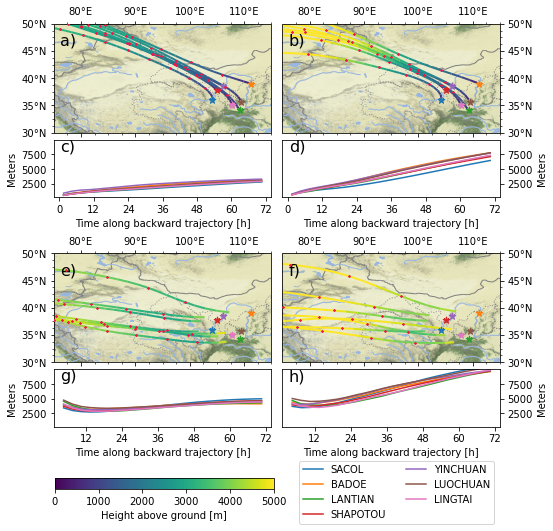

In [5]:
fig = plt.figure(figsize=(8,7.5))
gs = fig.add_gridspec(nrows=7, ncols=2, hspace=0.05,wspace=0.05, height_ratios=[1, 1, 1, 0.8, 1 ,1, 1])

lax = fig.add_subplot(gs[:2,0], projection=ccrs.PlateCarree(), label='lax0')
rax = fig.add_subplot(gs[:2,1],projection=ccrs.PlateCarree(), label='rax0')
plot_trajectories_all_locs(dsets,kind='drydep', axes=[lax,rax], vmax=5000,add_letters=False, add_colorbar=False)
lax.tick_params(axis="x", which='both',bottom=True, top=True, labelbottom=False, labeltop=True)
rax.tick_params(axis="x", which='both', bottom=True, top=True, labelbottom=False, labeltop=True)
rax.yaxis.tick_right()

vlax = fig.add_subplot(gs[2,0],label='vrax0')
vrax = fig.add_subplot(gs[2,1],label='vrax0')
vrax.set_ylabel('Meters')
vlax.set_ylabel('Meters')
vlax.set_ylim(200,10000)
vlax.set_yticks([2500,5000,7500])
vrax.set_ylim(200,10000)
vrax.set_yticks([2500,5000,7500])
vrax.yaxis.tick_right()
plot_trajectory_height_all_locs(dsets, kind='drydep', axes=[vlax,vrax],add_letters=False)
vrax.set_xlabel('Time along backward trajectory [h]')
vlax.set_xlabel('Time along backward trajectory [h]')
vrax.yaxis.set_label_position("right")
lax = fig.add_subplot(gs[4:6,0], projection=ccrs.PlateCarree())
rax = fig.add_subplot(gs[4:6,1],projection=ccrs.PlateCarree())
plot_trajectories_all_locs(dsets,kind='wetdep', axes=[lax,rax], vmax=5000,add_letters=False, add_colorbar=False)
lax.tick_params(axis="x", which='both',bottom=True, top=True, labelbottom=False, labeltop=True)
rax.tick_params(axis="x", which='both', bottom=True, top=True, labelbottom=False, labeltop=True)
rax.yaxis.tick_right()

vlax = fig.add_subplot(gs[6,0])
vrax = fig.add_subplot(gs[6,1])
vrax.set_ylabel('Meters')
vlax.set_ylabel('Meters')
vlax.set_ylim(200,10000)
vlax.set_yticks([2500,5000,7500])
vrax.set_ylim(200,10000)
vrax.set_yticks([2500,5000,7500])
vrax.yaxis.tick_right()
plot_trajectory_height_all_locs(dsets, kind='wetdep', axes=[vlax,vrax],add_letters=False)
vrax.set_xlabel('Time along backward trajectory [h]')
vlax.set_xlabel('Time along backward trajectory [h]')
vrax.yaxis.set_label_position("right")
axes = np.array(fig.get_axes())
add_letter(axes, y=0.8)
cbar_ax = fig.add_axes([0.127,0.01, 0.38,0.02])
fig.colorbar(cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=0,vmax=5000)), 
                 label='Height above ground [m]',orientation='horizontal',cax=cbar_ax)
h, l = vrax.get_legend_handles_labels()
fig.legend(h,l, bbox_to_anchor=(0.72, 0.004), loc='center',ncol=2)
if to_file:
    plt.savefig(snakemake.output.path_map, bbox_inches='tight')

### Vertical profile 

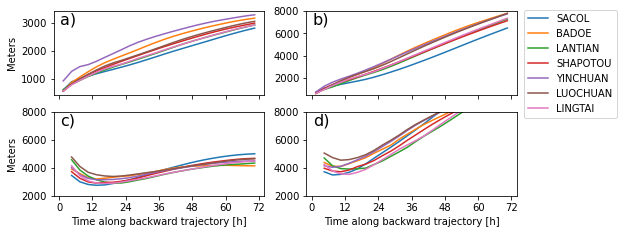

In [6]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(8.3,3.4), sharex=True)
plot_trajectory_height_all_locs(dsets, kind='drydep', axes=[ax[0,0],ax[0,1]],add_letters=False)
plot_trajectory_height_all_locs(dsets, kind='wetdep', axes=[ax[1,0],ax[1,1]],add_letters=False)
h, l = ax[0,0].get_legend_handles_labels()
fig.legend(h,l, bbox_to_anchor=(0.99, 0.665), loc='center')
add_letter(ax, y=0.84)
ax[0,1].set_ylim(500,8000)
ax[1,1].set_ylim(2000,8000)
ax[1,0].set_ylim(2000,8000)
ax[0,0].set_ylabel('Meters')
ax[1,0].set_ylabel('Meters')
ax[1,1].set_xlabel('Time along backward trajectory [h]')
ax[1,0].set_xlabel('Time along backward trajectory [h]')
if to_file:
        
    plt.savefig(snakemake.output.path_vertical_profile, bbox_inches='tight')
